<h2> Nauczanie maszynowe/Ćwiczenia4

<h3> Drzewa decyzyjne

Drzewa decyzyjne to graficzna metoda wspomagania procesu decyzyjnego. Tworzony jest model drzewiasty, który następnie używany jest do klasyfiakcji.

Elementy struktury drzewa:
- wierzchołek (punkt górny drzewa), z którego następują odgałęzienia
- węzły poprzednika na wyższym poziomie o odgałęzieniach łączących węzły następnika na niższym poziomie
- liście stanowiące końcową część drzewa, którym przypisane są odpowiednie klasy.

Budujemy w taki sposób aby minimalizować:

- współczynnik Giniego $I = 1 - \sum_i r_{i}^{2}$

lub 

- entropię $I = -\sum_i r_i \log_2 r_i$

gdzie $r_i$ to proporcja wystąpień $i-$tej klasy w aktualnym obszarze.

<h4> Zadanie1: Jaką minimalną i maksymalną wartość może przyjmować współczynnik Giniego? Uzasadnij. Co to wtedy oznacza?

Zakres [0, 1]. 0 oznacza doskonałą równość - wszystkie proporcje są takie same. 1 oznacza maksymalną nierwówność pomiędzy proporcjami.

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [2]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [58]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [3]:
from sklearn.tree import DecisionTreeClassifier

Kryterium jest entropia

In [4]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);

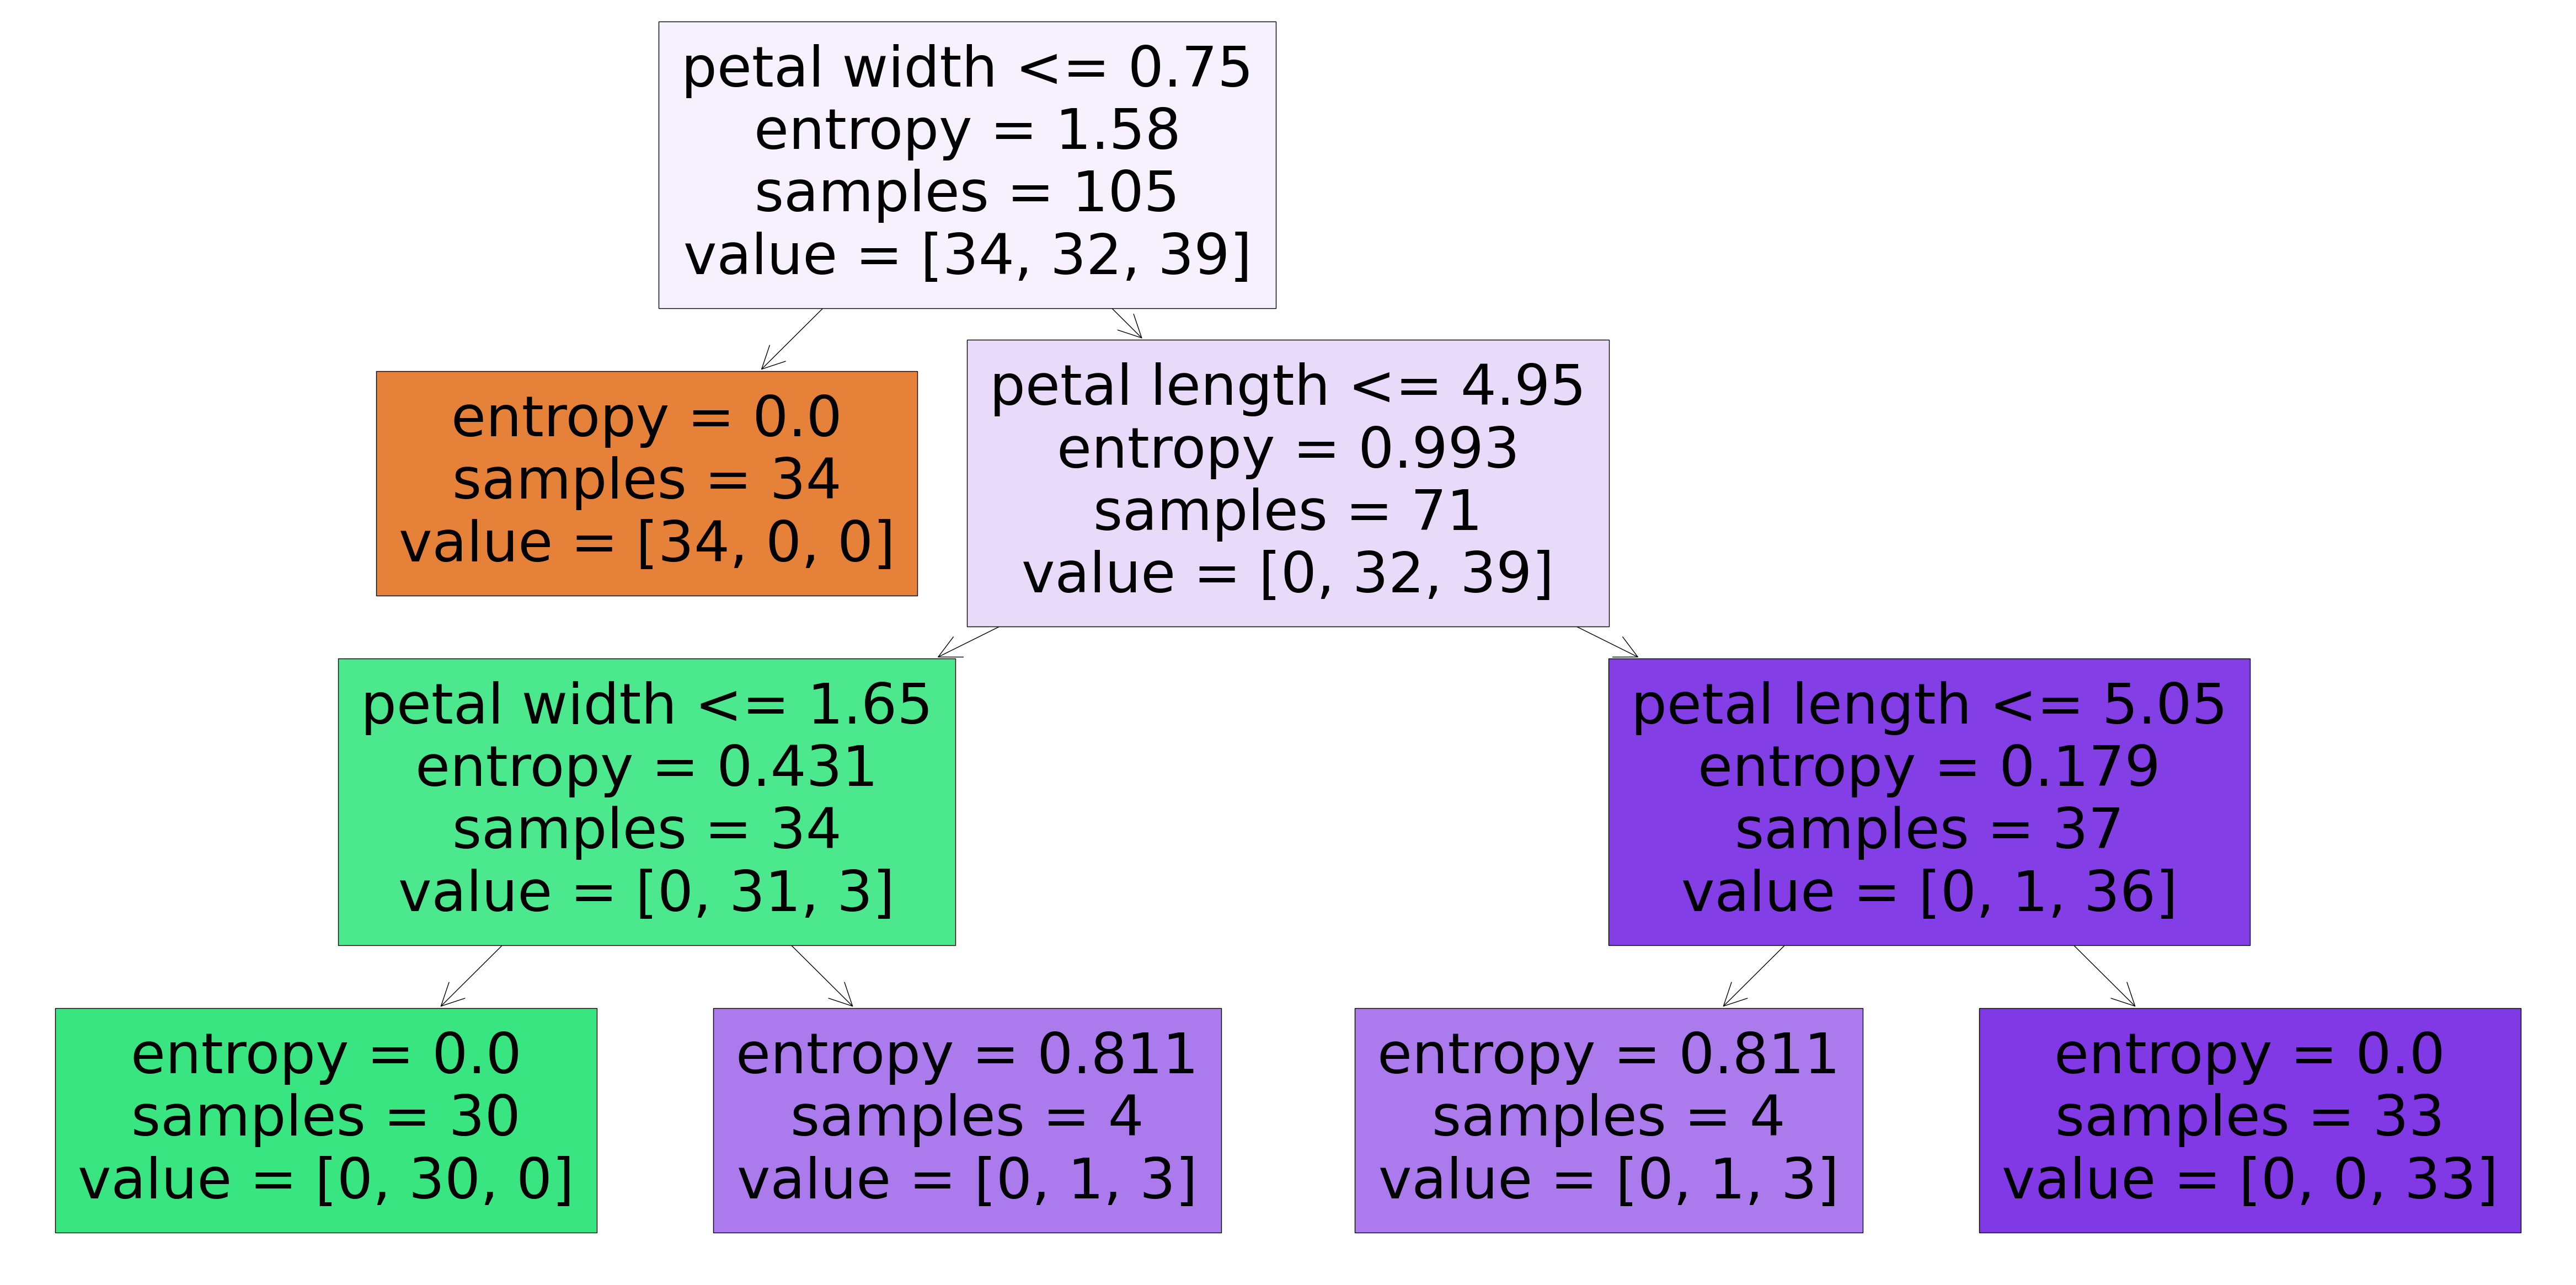

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, filled=True, feature_names=['petal length', 'petal width']);

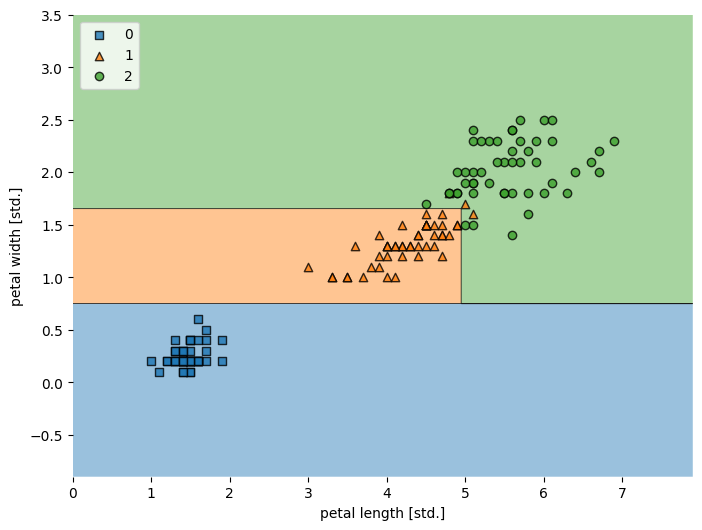

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(tree.predict([[1.4, 0.2]]))
print()
print(tree.predict([[5.1, 1.8]]))

[0]

[2]


<h4> Zadanie2: Uzasadnij wartość entropii w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [12]:
import math
entropia = 0
suma = 105
for i in [34, 32, 39]:
    entropia -= i/suma * math.log(i/suma, 2)
np.round(entropia, 3)

1.58

Kryterium jest indeks Giniego

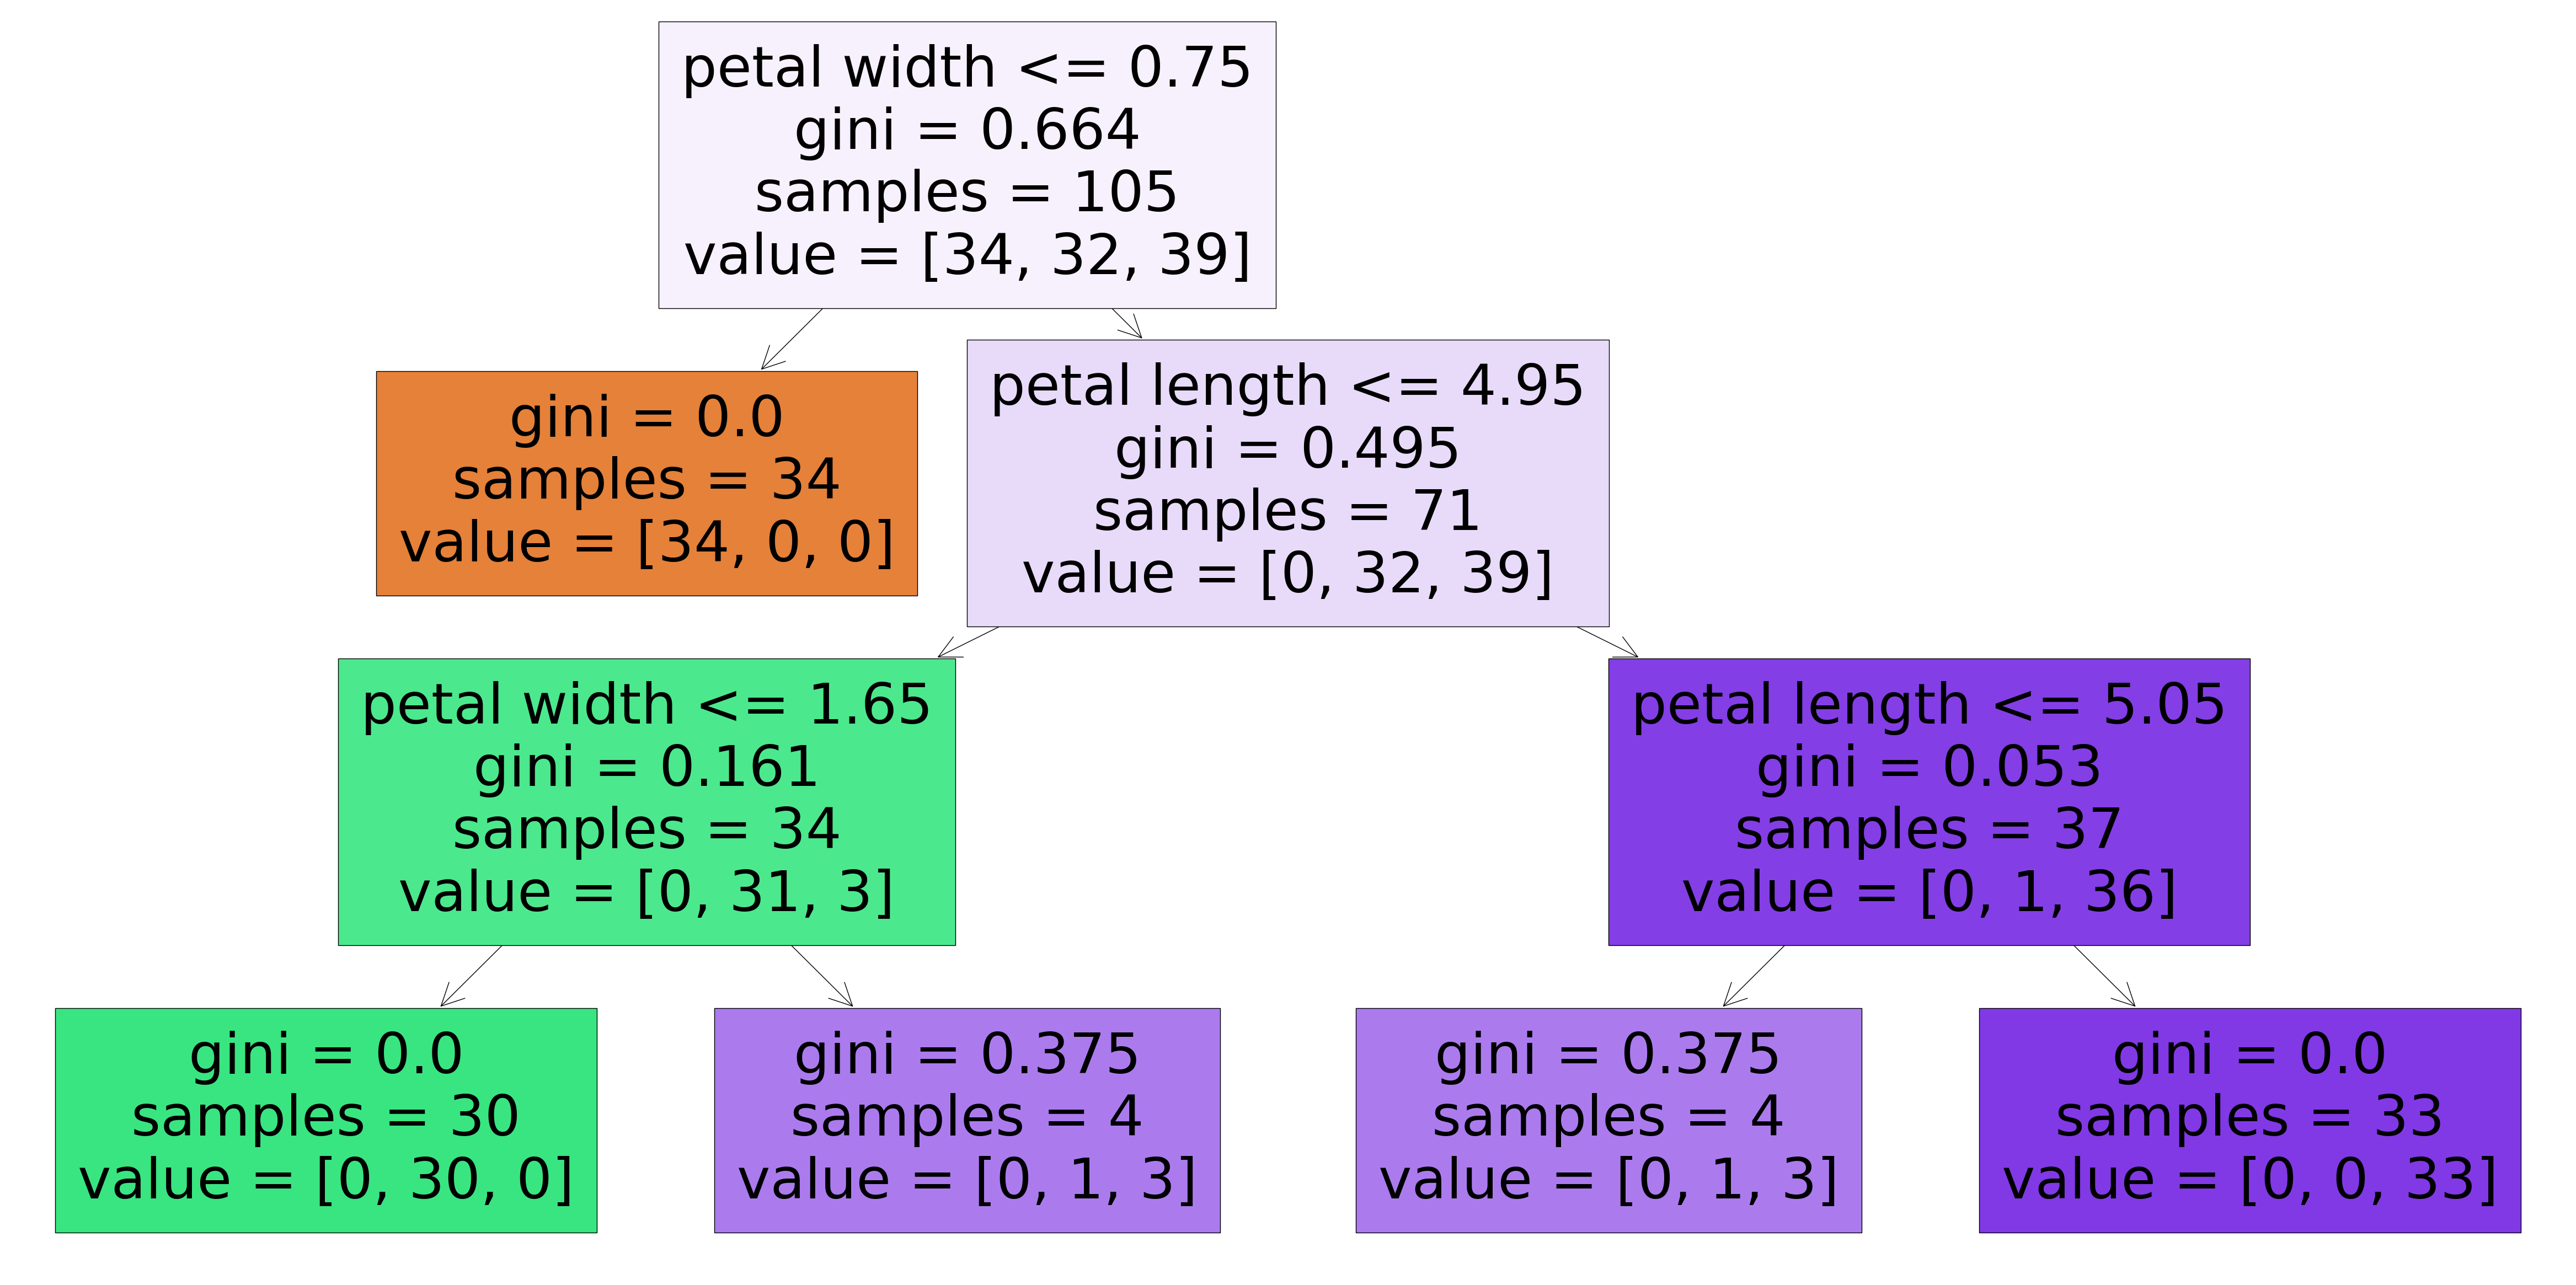

In [13]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(tree_gini, filled=True, feature_names=['petal length', 'petal width']);

<h4> Zadanie3: Uzasadnij wartość indeksu Giniego w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [15]:
giniegi = 1
suma = 105
for i in [34, 32, 39]:
    giniegi -= (i/105)**2
np.round(giniegi, 3)

0.664

<h3> Las losowy (Random Forest)

Losowy las jest odmianą zespołu drzew decyzyjnych implementujących wiele losowo generowanych drzew decyzyjnych na raz, które wspópracując ze sobą, tworzą finalne rozwiązanie o podwyższonej dokładności.

- do przewidywania wartości zmiennej zależnej stosuje się zespół wielu, stosunkowo prostych drzew decyzyjnych
- każde drzewo dokonuje predykcji wartości zmiennej zależnej na podstawie losowego zespołu zmiennych niezależnych
- przewidywanie końcowej wartości modelu wyznaczoneg jest przez głosowanie (klasyfikacja) lub uśrednianie (zadanie regresji)

Użytkownik może określić:
- złożność drzew składowych
- maksymalna liczba drzew
- kryterium zakończenia procesu
- inne...

Dobrze sprawdza się na bardzo dużych zbiorach danych, z ogromną liczbą zmiennych niezależnych, bez konieczności ich usuwania.

In [15]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators - liczba drzew; inne np max_depth - maksymalna glębokosc drzewa, warto poczytac help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train);

<h4> Zadanie4: Przeczytaj https://predictivesolutions.pl/jak-udoskonalic-algorytm-drzew-decyzyjnych. Sporządź odpowiednią notatkę.

<div class="alert alert-block alert-info">
    <h2><b>Drzewa decyzyjne</b></h2><br> Jest to struktura, która jest używana do klasyfikacji dużej liczby obserwacji za pomocą sekwencji prostych reguł deycyzjnych. Mimo, że są bardzo skuteczne, ma też swoje wady - głównym jej problemem jest niestabilność wyników, tj. bardzo mała zmiana w danych może oznaczać całkowicie inne końcowe drzewo.
</div>
<div class="alert alert-block alert-info">
    <h2><b>Agregacja bootstrapowania (bagging)</b></h2><br> Próba rozwiązania problemu niestabilności drzew została zapoczątkowana przez wykorzystanie nie jednego, ale wielu modeli drzewa. Polega ona na wielokrotnym losowaniu danych uczących i testowych w sposób bootstrapowy (ze względu na to, nie ma potrzeby podziału na zbiór uczący i walidacyjny). Następnie dla każdego wylosowanego zbioru, budowany jest model drzewa, a ostatecznie wybrany jest jeden na podstawie głosowania - np. wybierany jest ten wynik, który został wskazany przez największą liczbę pojdeynczych drzew. Końcowo jednak, ze względu na użycie tych samych predyktorów (które mogą być silnie skorelowane z objaśnianym zjawiskiem), nie uzyskamy satysfakcjonującego stabilnego modelu.
</div>

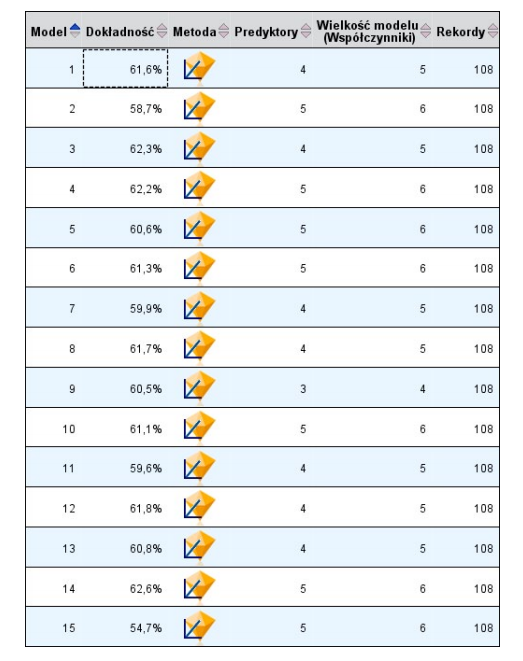

<div class="alert alert-block alert-info">   
   <h2><b>Lasy losowe</b></h2><br> Metoda bardzo podobna do baggingu, z tą różnicą, że do poszczególnych modeli drzew decyzyjnych wykorzystywane są nie wszystkie dostępne predyktory, a jedynie ich część. Najpierw, tak jak w metodzie baggingu, losujemy bootstrapowo podzbiory danych, a następnie wybieramy odpowiednie zmienneobjaśniające dla każdego z podzbiorów (też na zasadzie losowania!). W tym przypadku, ostateczny wybór też zachodzi na zasadzie głosowania. Jednak, cena jaką płacimy za sstabilność modelu, to dłuższy czas obliczeń, oraz trudniejsza intepretacja wyników.
</div>

<img src="3_lasy_losowe.png" style="height:400px">

<div class="alert alert-block alert-info">
    <h2><b>Adaboost</b></h2><br> Użycie wielu słabych klasyfkatorów w drodzę po sukces? Tak, tyle, że słabe oznaczają tutaj, że ich celem nie jest osiągnięcie maksymalnej skuteczności przez pojedynczy model drzewa, przez co, nie są one tutaj bardzo rozbudowane. Główna różnica w porównaniu do powyższych algorytmów, to taka, że Lasy Losowe działają w sposób równoległy - a w tym przypadku przeciwnie - pojedyncze drzewa są od siebie zależne, czyli podejście jest sekwencyjne, a kolejne klasyfikatory są ze sobą ściśle związane. Pierwsza iteracja - budowany jest bazowy klasyfikator, w kolejnych zachodzi koncentracja na tych obiektach, które zostały źle zaklasyfkowane. W ramach kolejnych iteracji, wagi obserwacji, które był błędne, zostają zwiększone, a tych które poprawne - zmienijszone, czyli eliminujemy błędy poprzedniego modelu.
</div>

<img src="4_adaboost.png" style="height:400px">

<div class="alert alert-block alert-info">
    <h2><b>Xgboost</b></h2><br> Algorytm wzmacniania gradientowego - mamy do czyunienia z zespołem klasyfikatorów, podobnie jak w Adaboost, wszystkie drzewa mają wpływ na rozwój klasyfikatorów. Główną różnicą jest wprowadzenie składnika regularyzacji - czyli kary nakładanej na model za zbyt dużą liczbę ostatenyczh segemntów obserwacji  - czyli liści w drzewie decyzyjnym (w ten sposób kontrolujemy złożoność modelu). Algorytm ten możemy podzielić na 2 części - pierwsza, to składnik odpowiadający za minimalizację błedu, nazywany funkcją straty (inaczej funkcja kosztu), a drugi to regularyzacja - czynność polegająca na zapobieganiu przetrenowaniu i kontrolująca złożoność modelu.
</div>

<h4> Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping). Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtórzymy $n$ razy, otrzymamy $n$ elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać. Pokaż, że dla dużych $n$ próba będzie zawierała średnio $63 \%$ przypadków z orginalnego zbioru.

$$\lim_{n \to +\infty} (1 - \frac{1}{n}) = \frac{1}{e} \approx 0.36788$$ <br>
To jest prawdopodobieństwo, że nie zostanie wybrane ponownie z oryginalnego zbioru, czyli: <br><br>
$$1- 0.37 \approx 0.63$$ c.n.w

<h3> Drzewa losowe do wyboru cech (Feature importance)

In [18]:
import pandas as pd

df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): #tyle cech
    print(f"{f+1} {feat_labels[f]} {round(importances[indices[f]],4)}")

FileNotFoundError: [Errno 2] No such file or directory: 'wine.data'

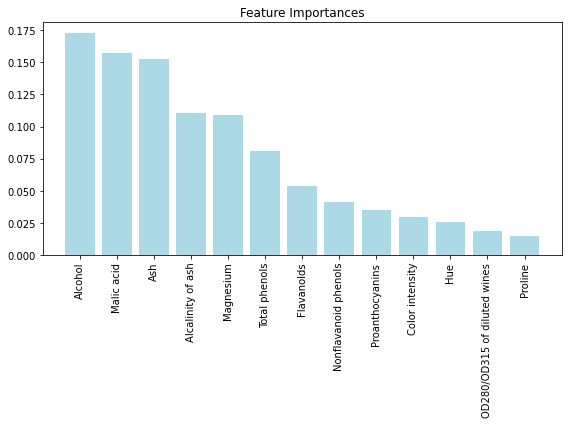

In [11]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<h3> Regresja za pomocą drzew losowych

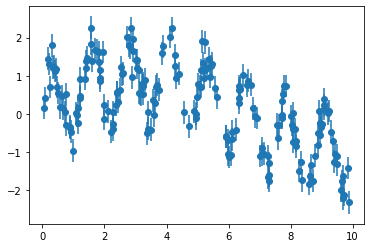

In [12]:
rng = np.random.RandomState(42)
x = 10* rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.errorbar(x, y, 0.3, fmt = "o")
plt.show()

In [2]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = "o", alpha =0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha = 0.5)
plt.show()

NameError: name 'x' is not defined

<h3> Lasy losowe do klasyfikacji cyfr

In [81]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

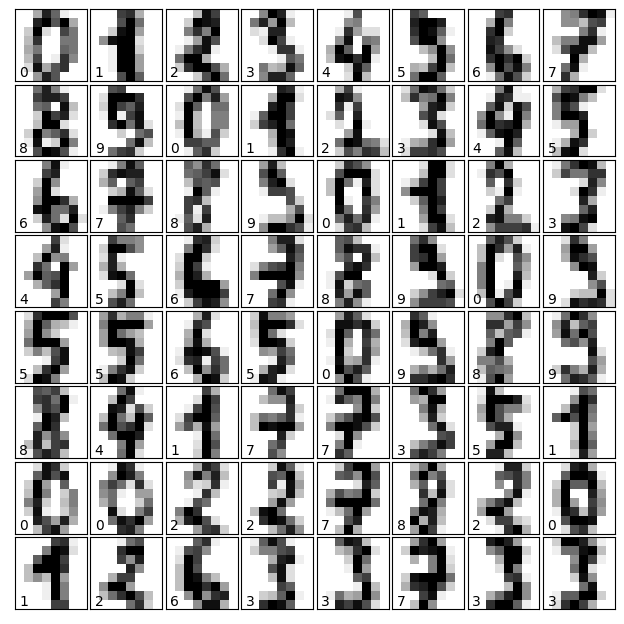

In [82]:
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right =1, bottom=0, top=1, hspace=0.05,wspace=0.05)

for i in range(64): #kazde zdjecie jest 8x8
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks =[])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = "nearest")
    ax.text(0, 7, str(digits.target[i])) #dodajemy label

In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [12]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

NameError: name 'ytest' is not defined

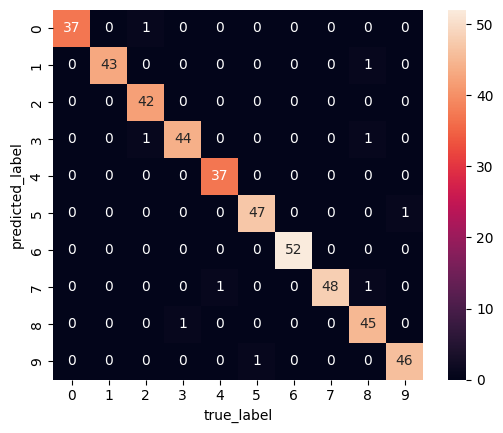

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<h4> Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968). Jeden nagłówek to jeden rekord. 
    
- Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.
- Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?

    Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe. Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa (długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr).
    Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

In [28]:
from nltk import word_tokenize
fake_dict, real_dict = {}, {}
fake, real = (open("fake.txt", "r")).read().split("\n"), (open("real.txt", "r")).read().split("\n")
for i in fake:
    for word in word_tokenize(i):
        if word in fake_dict.keys():
            fake_dict[word] += 1
        else:
            fake_dict[word] = 1
for i in real:
    for word in word_tokenize(i):
        if word in real_dict.keys():
            real_dict[word] += 1
        else:
            real_dict[word] = 1
all = {**fake_dict, **real_dict}     
sum_of_all = sum(list(all.values()))
all_v2 = {i:all[i]/sum_of_all for i in all}
all_v2_sorted = {k: v for k, v in sorted(all_v2.items(), key=lambda item: item[1], reverse = True)}

In [4]:
from nltk.corpus import stopwords

a = [(i, all_v2_sorted[i]) for i in all_v2_sorted if i.lower() not in stopwords.words('english')]
for i in range(10):
    print(a[i])

('trump', 0.08776167471819646)
('donald', 0.04171698872785829)
('us', 0.011574074074074073)
('trumps', 0.011020531400966184)
('says', 0.0089573268921095)
('election', 0.004378019323671498)
('clinton', 0.004176731078904992)
('north', 0.004176731078904992)
('korea', 0.003975442834138487)
('ban', 0.0037741545893719805)


In [5]:
real_dict_formatted = {i:real_dict[i]/sum_of_all for i in real_dict}
real_dict_formatted = {k: v for k, v in sorted(real_dict_formatted.items(), key=lambda item: item[1], reverse = True)}

b = [(i, real_dict_formatted[i]) for i in real_dict_formatted if i.lower() not in stopwords.words('english')]
for i in range(10):
    print(b[i])

('trump', 0.08776167471819646)
('donald', 0.04171698872785829)
('us', 0.011574074074074073)
('trumps', 0.011020531400966184)
('says', 0.0089573268921095)
('election', 0.004378019323671498)
('north', 0.004176731078904992)
('clinton', 0.004176731078904992)
('korea', 0.003975442834138487)
('ban', 0.0037741545893719805)


In [6]:
fake_dict_formatted = {i:fake_dict[i]/sum_of_all for i in fake_dict}
fake_dict_formatted = {k: v for k, v in sorted(fake_dict_formatted.items(), key=lambda item: item[1], reverse = True)}

b = [(i, fake_dict_formatted[i]) for i in fake_dict_formatted if i.lower() not in stopwords.words('english')]
for i in range(10):
    print(b[i])

('trump', 0.06682769726247988)
('donald', 0.011473429951690822)
('hillary', 0.007548309178743961)
('clinton', 0.006642512077294686)
('election', 0.0037238325281803543)
('new', 0.003371578099838969)
('president', 0.00322061191626409)
('obama', 0.0030193236714975845)
('america', 0.002717391304347826)
('win', 0.0025161030595813203)


In [7]:
len(all_v2_sorted.keys())

5832

In [29]:
all_data = []
klucze = list(all_v2_sorted.keys())
for i in fake:
        X = [0] * len(all_v2_sorted)
        tokens = word_tokenize(i)
        for l in tokens:
            X[klucze.index(l)] = 1
        all_data.append((X, "fake"))
   
for i in real:
        X = [0] * len(all_v2_sorted)
        tokens = word_tokenize(i)
        for l in tokens:
            X[klucze.index(l)] = 1
        all_data.append((X, 'real'))

In [30]:
import random
shuffled = random.shuffle(all_data)

In [31]:
import random
shuffled = random.shuffle(all_data)
treningowy_len = int(len(all_data) * 0.7)
wali_len = int(len(all_data) * 0.15)
treningowy = all_data[:treningowy_len]
walidacyjny = all_data[treningowy_len:treningowy_len+wali_len]
testowy = all_data[treningowy_len+wali_len:]

In [93]:
X_train = [x[0] for x in treningowy]
y_train = [x[1] for x in treningowy]
X_test = [x[0] for x in testowy]
y_test = [x[1] for x in testowy]
y_pred = [x[1] for x in walidacyjny]

#Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.55      0.88      0.67       125
        real       0.95      0.75      0.84       366

    accuracy                           0.78       491
   macro avg       0.75      0.82      0.76       491
weighted avg       0.85      0.78      0.80       491



In [94]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.54      0.81      0.64       134
        real       0.91      0.74      0.82       357

    accuracy                           0.76       491
   macro avg       0.72      0.77      0.73       491
weighted avg       0.81      0.76      0.77       491



In [95]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.55      0.87      0.67       126
        real       0.94      0.75      0.84       365

    accuracy                           0.78       491
   macro avg       0.75      0.81      0.75       491
weighted avg       0.84      0.78      0.79       491



In [96]:
model = RandomForestClassifier(n_estimators=10000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.55      0.89      0.68       124
        real       0.95      0.75      0.84       367

    accuracy                           0.79       491
   macro avg       0.75      0.82      0.76       491
weighted avg       0.85      0.79      0.80       491



Inne podejście, które mi przyszło do głowy

In [105]:
print(len(klucze))

5832


In [23]:
all_data = []
klucze = list(all_v2_sorted.keys())
for i in fake:
        X = [0] * 10
        tokens = word_tokenize(i)
        for l in tokens:
            ktory = int(klucze.index(l)/584)
            X[ktory - 1] += klucze.index(l)
        all_data.append((X, "fake"))
   
for i in real:
        X = [0] * 10
        tokens = word_tokenize(i)
        for l in tokens:
            ktory = int(klucze.index(l)/584)
            X[ktory - 1] += klucze.index(l)
        all_data.append((X, 'real'))

shuffled = random.shuffle(all_data)
treningowy_len = int(len(all_data) * 0.7)
wali_len = int(len(all_data) * 0.15)
treningowy = all_data[:treningowy_len]
walidacyjny = all_data[treningowy_len:treningowy_len+wali_len]
testowy = all_data[treningowy_len+wali_len:]        
        
X_train = [x[0] for x in treningowy]
y_train = [x[1] for x in treningowy]
X_test = [x[0] for x in testowy]
y_test = [x[1] for x in testowy]

#Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.86      0.86      0.86       199
        real       0.90      0.91      0.91       292

    accuracy                           0.89       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.89      0.89      0.89       491



czyli zamiast wektora zawierającego wszystkie słowa, tworzymy wektor o długości 10 - na kolejne len(data)/10 słów, a wartości w nim to będzie suma znalezionych indeksów. Czyli jeżeli len(data) 5832, to liczba elementów w słowniku, który idzie do X[0] to 584 - i dla każdego następnego znalezionego słowa X[0] += index(dane_słowo). Co prawda precyzja dla prwadziwych zmalała o 5 %, ale dla fake'owych wzrosła o 31 % "ale jest to poświęcenie, na które jestem gotów".

Co do liczby hiperparametrów - dla pierwszego sposobu widać tak naprawdę przetrenowanie dla 100+, ponieważ skuteczność nie wzrosła analogicznie do przeskoku 100 - 1000

Regresja - tutaj wyniki są o wile lepsze w przybliżeniu, że y_pred > 0.5 oznacza real, a <= 0.5 fake

In [32]:
#bez redukcji
X_train = [x[0] for x in treningowy]
y_train = [x[1] for x in treningowy]
X_test = [x[0] for x in testowy]
y_test = [x[1] for x in testowy]
y_pred = [x[1] for x in walidacyjny]

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.37      0.38      0.37       199
        real       0.57      0.56      0.57       292

    accuracy                           0.49       491
   macro avg       0.47      0.47      0.47       491
weighted avg       0.49      0.49      0.49       491



In [27]:
#zredukowane
X_train = [x[0] for x in treningowy]
y_train = [x[1] for x in treningowy]
X_test = [x[0] for x in testowy]
y_test = [x[1] for x in testowy]
y_pred = [x[1] for x in walidacyjny]

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

        fake       0.86      0.86      0.86       199
        real       0.90      0.91      0.91       292

    accuracy                           0.89       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.89      0.89      0.89       491



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3> Uzupełnienie

<h3> Więcej o agregracji bootstrapowej w kontekście lasów losowych

Proces uczenia modelu lasu:
    
- z danych treningowych jest losowana próba bootstrap (wybiera się z powtórzeniami $k$ przypadków)
- próba ta jest używana do uczenia pojedynczego drzewa decyzyjnego. Takie drzewo jest tworzone na podstawie losowo wybranych $x$ atrybutów (z listy wszystkich dostępnych)
- zbudowane drzewo jest oceniane za pomocą przypadków niewybranych do próby bootstrap -> mierzymy: dokładność predykcji, wpływ atrybutów wejściowych na dokładność predykcji
- powtarzamy poprzednie kroki $n$ razy
- odpowiedzi na zapyania predykcyjne (wyniki zwracane przez model) są ustalane przez głosowanie przy użyciu wchodzących w jego skład drzew decyzyjnych (głosowanie większościowe)

Zalety:
- zmniejszamy ryzyko przeuczenia modelu
- stabilność modelu (mniej prawdopodobne wyniki odrzucane)


In [19]:
import pandas as pd
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [20]:
#jedno drzewo, niezle ale troche przetrenowane
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred  = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test  = accuracy_score(y_test,  y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'%(tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.926


In [21]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=500, 
                        max_samples=1., 
                        max_features=1., 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred  = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test  = accuracy_score(y_test,  y_test_pred)
print('Bagging tree train/test accuracies %.3f/%.3f'%(bag_train, bag_test))

Bagging tree train/test accuracies 1.000/0.981
